In [5]:
from sklearn import tree
features = [[140,1],[130,1],[150,0],[170,0]]
labels = [0,0,1,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features,labels)

In [6]:
print(clf.predict([[150, 0]]))

[1]


In [28]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
test_idx = [0,50,100]

#training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data,test_idx, axis = 0)

#testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

clf2 = tree.DecisionTreeClassifier()
clf2.fit(train_data, train_target)

print(clf2.predict(test_data)) 

[0 1 2]


([array([  0.,  11.,  29.,  72., 124., 132.,  80.,  40.,   9.,   3.]),
  array([ 18.,  68., 116., 206., 237., 205.,  93.,  44.,   9.,   4.])],
 array([13.73284467, 16.4888661 , 19.24488753, 22.00090895, 24.75693038,
        27.51295181, 30.26897323, 33.02499466, 35.78101609, 38.53703751,
        41.29305894]),
 <a list of 2 Lists of Patches objects>)

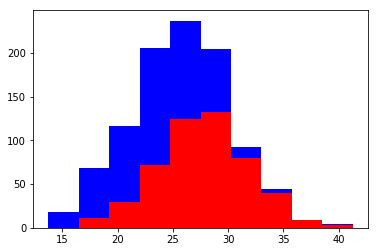

In [37]:
import matplotlib.pyplot as plt
greyhounds = 500
labs = 500

grey_height = 28 + 4*np.random.randn(greyhounds)
lab_height = 24 + 4*np.random.randn(labs)
plt.hist([grey_height, lab_height], stacked = True, color = ['r','b'])

In [53]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .7)

from sklearn import tree

my_tree_clf = tree.DecisionTreeClassifier()
my_tree_clf.fit(X_train, y_train)

predictions = my_tree_clf.predict(X_test)
print(predictions)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

from sklearn.neighbors import KNeighborsClassifier

my_neighb_clf = KNeighborsClassifier()
my_neighb_clf.fit(X_train, y_train)
predictions = my_neighb_clf.predict(X_test)
print(accuracy_score(y_test, predictions))


[0 1 0 0 1 0 2 2 1 2 1 1 2 0 1 1 0 2 2 2 0 2 0 0 0 2 1 2 2 1 0 1 0 2 1 2 2
 2 0 0 1 2 1 0 2 1 0 1 2 1 1 0 2 0 0 2 0 0 0 2 0 1 2 2 2 2 2 1 1 1 1 0 0 2
 1 0 0 0 1 2 2 2 0 2 1 0 0 2 2 0 2 1 1 1 1 1 2 2 0 1 0 2 1 0 1]
0.9428571428571428
0.9333333333333333


In [55]:
from scipy.spatial import distance

def euc(a,b):
    return distance.euclidean(a,b)

class ScrappyKNN():
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        pass
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euc(row,self.X_train[0])
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = euc(row,self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        return self.y_train[best_index]
        
myClf = ScrappyKNN()
myClf.fit(X_train, y_train)

predictions = myClf.predict(X_test)
print(accuracy_score(y_test, predictions))


0.9523809523809523
